In [5]:
import sys
from pathlib import Path
from sampler_perturbations import f_theta_sampler
import numpy as np
import jax
import jax.numpy as jnp
from jax import random, jit, vmap
from tqdm.auto import tqdm
import time
from matplotlib import pyplot as plt
Path("results").mkdir(exist_ok=True)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from all_tests import hsicfuse_test, hsic_test
from all_tests import hsicagginc_test, hsicagg_test
from all_tests import nfsic_test, nyhsic_test, fhsic_test

### Time <br>
### Vary Sample Size 

In [3]:
repetitions          = 100
scale                = 0.5
f_theta_seed         = 0
p                    = 2
s                    = 1
d                    = 2

tests_hsic_vary_n = (hsicfuse_test, hsic_test, hsicagginc_test, hsicagg_test, nfsic_test, nyhsic_test, fhsic_test)
tests_names_hsic_vary_n = ["hsicfuse_test", "hsic_test", "hsicagginc_test", "hsicagg_test", "nfsic_test", "nyhsic_test", "fhsic_test"]
tests = tests_hsic_vary_n

N_values = [200, 400, 600, 800, 1000]
time_hsic_vary_n_mean = np.zeros((len(tests), len(N_values)))
time_hsic_vary_n_std = np.zeros((len(tests), len(N_values)))
rs = np.random.RandomState(0)
x_axis_hsic_vary_n = N_values
key = random.PRNGKey(42)
seed = 0

for r in tqdm(range(len(N_values))):
    N = N_values[r]
    seed += 1
    perturbation_multiplier = np.exp(d) * p ** s * scale
    Z = f_theta_sampler(f_theta_seed, seed, N, p, s, perturbation_multiplier, d)
    X = np.expand_dims(Z[:, 0], 1)
    Y = np.expand_dims(Z[:, 1], 1)
    key, subkey = random.split(key)
    for j in range(len(tests)):
        test = tests[j]
        time_f = %timeit -o -r 20 -n 1 test(X, Y, subkey, seed)
        time_hsic_vary_n_mean[j][r] = np.mean(time_f.timings)
        time_hsic_vary_n_std[j][r] = np.std(time_f.timings)    
np.save("results/time_vary_n_mean.npy", time_hsic_vary_n_mean)
np.save("results/time_vary_n_std.npy", time_hsic_vary_n_std)


  0%|          | 0/5 [00:00<?, ?it/s]

The slowest run took 7.92 times longer than the fastest. This could mean that an intermediate result is being cached.
1.15 s ± 1.29 s per loop (mean ± std. dev. of 20 runs, 1 loop each)
The slowest run took 76.74 times longer than the fastest. This could mean that an intermediate result is being cached.
85.4 ms ± 294 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)
The slowest run took 7995.95 times longer than the fastest. This could mean that an intermediate result is being cached.
961 ms ± 4.18 s per loop (mean ± std. dev. of 20 runs, 1 loop each)
The slowest run took 7166.06 times longer than the fastest. This could mean that an intermediate result is being cached.
944 ms ± 4.1 s per loop (mean ± std. dev. of 20 runs, 1 loop each)
The slowest run took 45.35 times longer than the fastest. This could mean that an intermediate result is being cached.
2.8 s ± 8.25 s per loop (mean ± std. dev. of 20 runs, 1 loop each)
17 ms ± 9.2 ms per loop (mean ± std. dev. of 20 runs, 1 loop ea

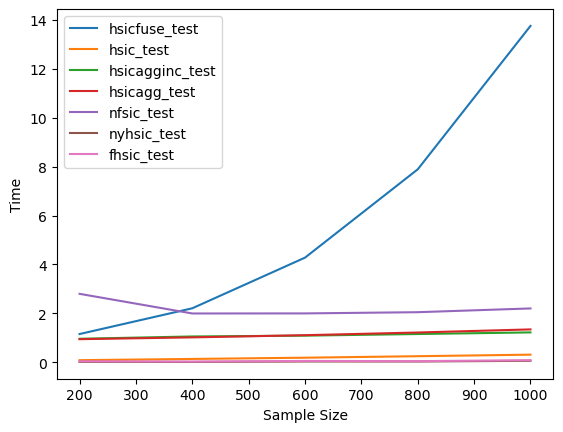

In [7]:
time_mean = np.load("results/time_vary_n_mean.npy")
time_std = np.load("results/time_vary_n_std.npy")
tests_names = ["hsicfuse_test", "hsic_test", "hsicagginc_test", "hsicagg_test", "nfsic_test", "nyhsic_test", "fhsic_test"]
x_axis = N_values
for j in range(len(tests_names)):
    plt.errorbar(x_axis, time_mean[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("Sample Size")
    plt.ylabel("Time")